# **Problem Statement and Background**

---



The problem this project addresses is the relationship between education level, race, gender, and wage. Wage disparity is a critical issue in labor economics and social justice, as it reflects underlying factors influencing economic inequality. Understanding these relationships can provide insights into the dynamics of the labor market, highlight areas of inequality, and inform policy decisions aimed at promoting fairness and equality.

For this project, we will be analyzing the wages of individuals at five different education levels. We will be investigating the disparities that exist between the wages of people of different races and genders within those education levels. We will also be looking at how these disparities have either grown or shrunk over the period of time that this dataset covers (1973-2022). By doing this, we can gain an understanding on the status of wage inequality in the United States.


# **Description of Data**

---



The data for this project originates from a dataset found on Kaggle, which details average wage per hour of individuals categorized by several key demographic factors: education level, race, and gender. The data contains:

**Rows:**
*   *Yearly Data:* Rows in the dataset are organized by year, ranging from 1973 to 2022. This allows for a temporal analysis of wage trends.

**Columns:**
*   *Education Levels:* The dataset contains information regarding wages of individuals categorized into five distinct education levels. These include less than high school, high school, some college, bachelor's degree, and advanced degree.
*   *Racial and Ethnic Groups:* The dataset provides wage information for 3 different racial groups: White, Black, and Hispanic.
*   *Gender:* Wage data is segregated by gender, offering a perspective on gender-based wage differences.

**Values:**
*   *Average Wages:* For each column, the dataset lists the average wage on an hourly basis, offering a means to compare and analyze wage disparities across different demographics.

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
#drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Read in the data
filepath = "/content/drive/MyDrive/DS 2001/wages_by_education.csv"
data = pd.read_csv(filepath)

# preview data
data.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [ ]:
data.info()

In [ ]:
data.columns

# **Methods**

---



## **Education Level vs. Average Wage**

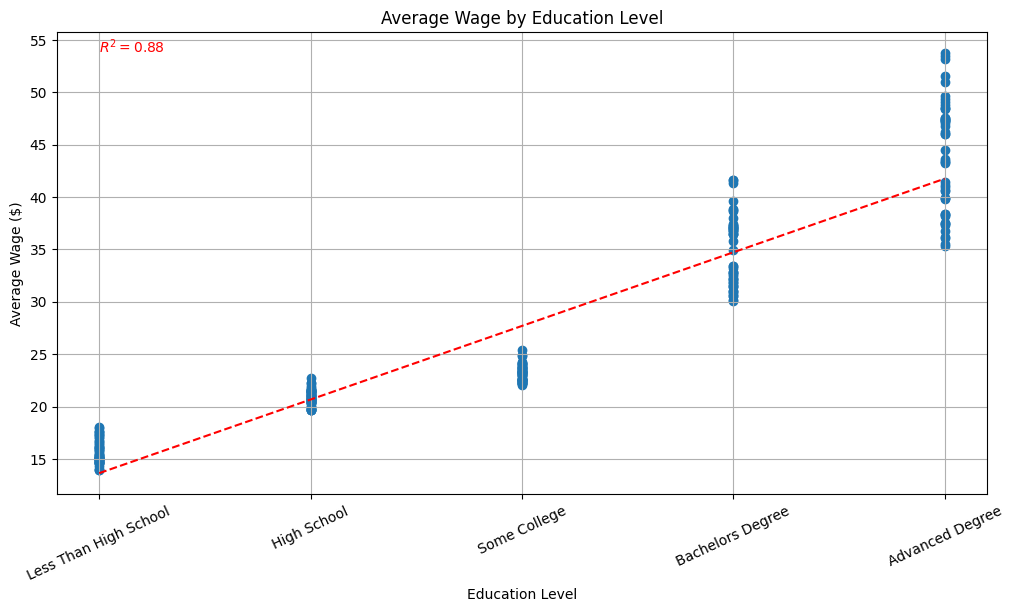

In [ ]:
# Determine the correlation between education level and average wage

# Choose the columns to extract data from
columns = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree',
           'advanced_degree']
general_data = data[columns]

# Make the data easier to read
easy_data = general_data.stack().reset_index()
easy_data.columns = ['year', 'education_level', 'average_wage']

# Create a dictionary for the educaton levels
education_level_mapping = {'less_than_hs': 1,
                            'high_school': 2,
                            'some_college': 3,
                            'bachelors_degree': 4,
                            'advanced_degree': 5}

# Rewrite each education level from what it is in the csv file
label_mapping = {1: 'Less Than High School',
                 2: 'High School',
                 3: 'Some College',
                 4: 'Bachelors Degree',
                 5: 'Advanced Degree'}

easy_data['education_numeric'] = easy_data['education_level'].map(education_level_mapping)

# Fit a linear regression model
z = np.polyfit(easy_data['education_numeric'], easy_data['average_wage'], 1)
p = np.poly1d(z)

# Calculate R^2
r_squared = np.corrcoef(easy_data['education_numeric'], easy_data['average_wage'])[0, 1]**2

# Create graph
plt.figure(figsize=(12, 6))

# Make the scatter plot
plt.scatter(easy_data['education_numeric'], easy_data['average_wage'])

# Make the regression line
plt.plot(easy_data['education_numeric'], p(easy_data['education_numeric']), "r--")

plt.xticks(ticks=[1, 2, 3, 4, 5], labels = label_mapping.values(), rotation = 25)
plt.title('Average Wage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Wage ($)')
plt.grid(True)

# Put the regression line on the plot
plt.text(1, max(easy_data['average_wage']), f'$R^2 = {r_squared:.2f}$',
         color = 'red')

plt.show()

**Methods:**

*   *Stacking:* Applied stack() to convert the dataset to a long format, where each row represents a year, education level, and the corresponding average wage.
*   *Renaming Columns:* Renamed columns to 'year', 'education_level', and 'average_wage' for clarity.
*   *Mapping Education Levels:* Categorical education levels were mapped to numeric values to enable correlation analysis.
*   *Linear Regression:* Applied to understand the relationship between education level (numerically mapped) and average wage.
*   *Correlation Coefficient:* Calculated to quantify the strength of the relationship.
*   *Scatter Plot:* Created with a linear regression line to visually demonstrate trends and correlations.

These methods were selected to clearly represent the relationship between education level and average wage, addressing the core aspect of the problem statement related to wage disparities and education attainment.

**Sources:** Consulted Real Python for information on correlations in Python (https://realpython.com/numpy-scipy-pandas-correlation-python/)

**Results:**

The R^2 value shows that education level and wage have a strong postive correlation, proving that a higher education level correlates to a higher wage.

## **Gender Wage Gap by Education Level**



<Axes: title={'center': 'Average Wages in 2022 by Gender and Education Level'}, xlabel='Education Level', ylabel='Average Wages per Hour ($)'>

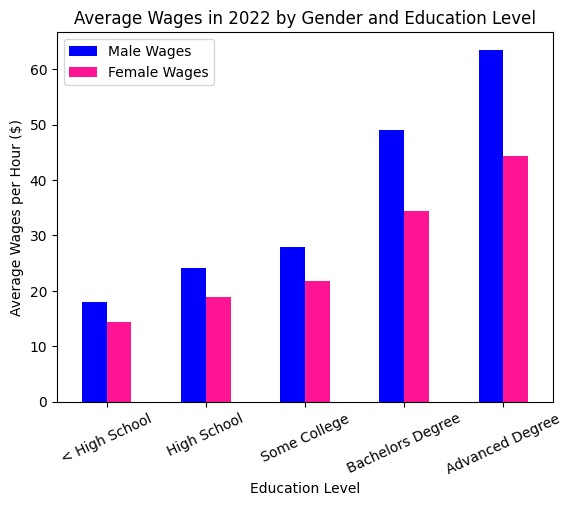

In [ ]:
# creating a bar graph to show average wage by gender within each education level

# Locate value in dataset with the given header and year
def find_value(header, year):
  data_dicts = data.to_dict(orient = "list")
  return data_dicts[header][abs(year - 2022)]

# Return data from the specified columns of a given year (in the form of a list)
def get_data(list_of_wages, columns, year):

  # for each column, access the value for the given year and add it to a list
  for i in columns:
    value = find_value(i, year)
    list_of_wages.append(value)
  return list_of_wages

# Create lists of categories for double bar graph
male_columns = ["men_less_than_hs", "men_high_school", "men_some_college",
           "men_bachelors_degree", "men_advanced_degree"]
female_columns = ["women_less_than_hs", "women_high_school", "women_some_college",
                  "women_bachelors_degree", "women_advanced_degree"]

# Create lists of values for double bar graph
male_wages = get_data([], male_columns, 2022)
female_wages = get_data([], female_columns, 2022)

# Create data frame for bar graph
gender_data = pd.DataFrame({
    "Education Level": ["< High School", "High School", "Some College",
                        "Bachelors Degree", "Advanced Degree"],
    "Male Wages": male_wages, "Female Wages": female_wages})

# Plot data on bar graph
gender_data.plot(x = "Education Level", y = ["Male Wages", "Female Wages"],
                 kind = "bar", color = ["blue", "deeppink"],
                 ylabel = "Average Wages per Hour ($)", rot = 25,
                 title = "Average Wages in 2022 by Gender and Education Level")

**Methods:**

*   *Data Frame:* used pandas.DataFrame() to organize data into a format that can be easily used to create a double bar graph.
*   *Bar Graph:* Created a double bar graph to clearly show the gender disparity in wages within distinct education levels.



**Results:**

The bar graph shows that there exists a gender wage gap (where men make more than women) across all education levels.


### **Gender Wage Gaps Over Time**

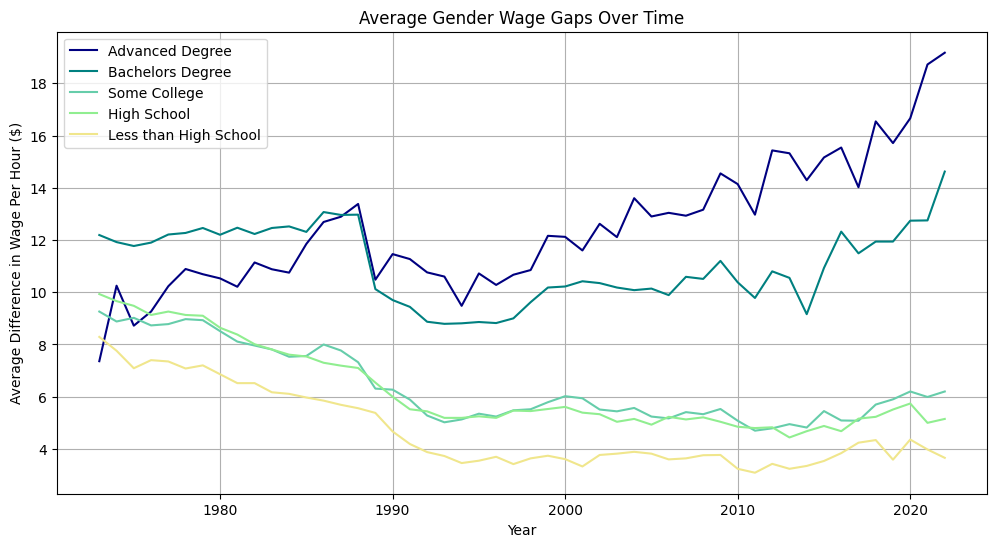

In [ ]:
# creating a line graph to show the average disparity in wages of men vs. women
# over time with each line representing a different education level

# add gender wage-gap columns to dataset
data["gender_gap_advanced_degree"] = data["men_advanced_degree"] - data["women_advanced_degree"]
data["gender_gap_bachelors_degree"] = data["men_bachelors_degree"] - data["women_bachelors_degree"]
data["gender_gap_some_college"] = data["men_some_college"] - data["women_some_college"]
data["gender_gap_high_school"] = data["men_high_school"] - data["women_high_school"]
data["gender_gap_less_than_hs"] = data["men_less_than_hs"] - data["women_less_than_hs"]

# Assign labels to the data
def get_label(column, education_level = "adanced_degree"):
    labels = {"gender_gap_advanced_degree": "Advanced Degree",
              "gender_gap_bachelors_degree": "Bachelors Degree",
              "gender_gap_some_college": "Some College",
              "gender_gap_high_school": "High School",
              "gender_gap_less_than_hs": "Less than High School",
              f"white_men_{education_level}": "White Men",
              f"black_men_{education_level}": "Black Men",
              f"hispanic_men_{education_level}": "Hispanic Men",
              f"white_women_{education_level}": "White Women",
              f"black_women_{education_level}": "Black Women",
              f"hispanic_women_{education_level}": "Hispanic Women"}
    return labels[column]

# Assign colors to the data
def get_color(column, education_level = "advanced_degree"):
    colors = {"gender_gap_advanced_degree": "navy",
              "gender_gap_bachelors_degree": "teal",
              "gender_gap_some_college": "mediumaquamarine",
              "gender_gap_high_school": "lightgreen",
              "gender_gap_less_than_hs": "khaki",
              f"white_men_{education_level}": "green",
              f"black_men_{education_level}": "blue",
              f"hispanic_men_{education_level}": "rebeccapurple",
              f"white_women_{education_level}": "limegreen",
              f"black_women_{education_level}": "deepskyblue",
              f"hispanic_women_{education_level}": "mediumpurple"}
    return colors[column]


# create list of columns of data to display on line graph
columns = ["gender_gap_advanced_degree", "gender_gap_bachelors_degree",
           "gender_gap_some_college", "gender_gap_high_school",
           "gender_gap_less_than_hs"]

# Create the line graph
plt.figure(figsize=(12, 6))

# plot each line on the graph
for column in columns:
  plt.plot(data["year"], data[column],
    label = get_label(column),
    color = get_color(column))

# Display the line graph
plt.title("Average Gender Wage Gaps Over Time")
plt.xlabel("Year")
plt.ylabel("Average Difference in Wage Per Hour ($)")
plt.legend()
plt.grid(True)
plt.show()

**Methods:**

*   *Adding Columns:* modified the dataset by adding columns to show the difference in how much more men make than women at each education level over time.
*   *Line Graph:* created a line graph to visually represend the gender wage disparities at each education level over time.



**Results:**

The line graph shows the gender wage gap has decreased over time for individuals with lower levels of education, while the gap has increased over time for individuals with higher levels of education (bachelors and advanced degrees).

## **Race Wage Gap by Education Level**

<Axes: title={'center': 'Average Wages in 2022 by Race and Education Level'}, xlabel='Education Level', ylabel='Average Wages per Hour ($)'>

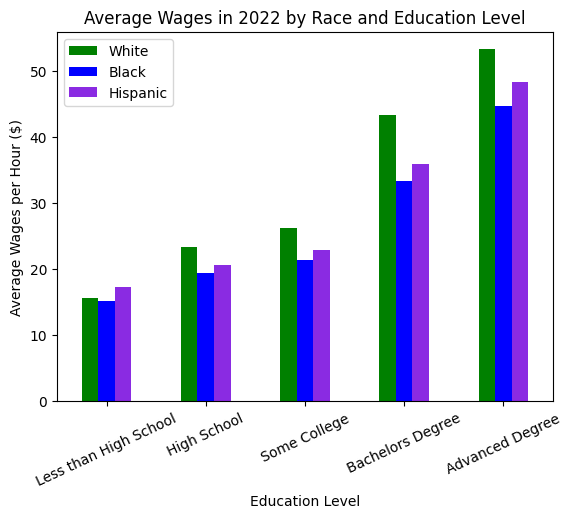

In [ ]:
# creating a bar graph to show average wage by race within each education level

# Create lists of categories for bar graph
white_columns = ["white_less_than_hs", "white_high_school", "white_some_college",
                 "white_bachelors_degree", "white_advanced_degree"]
black_columns = ["black_less_than_hs", "black_high_school", "black_some_college",
                 "black_bachelors_degree", "black_advanced_degree"]
hispanic_columns = ["hispanic_less_than_hs", "hispanic_high_school",
                    "hispanic_some_college", "hispanic_bachelors_degree",
                    "hispanic_advanced_degree"]

# Create lists of values for double bar graph
white_wages = get_data([], white_columns, 2022)
black_wages = get_data([], black_columns, 2022)
hispanic_wages = get_data([], hispanic_columns, 2022)

# Create data frame for bar graph
race_data = pd.DataFrame({
    "Education Level": ["Less than High School", "High School", "Some College",
                        "Bachelors Degree", "Advanced Degree"],
    "White": white_wages, "Black": black_wages, "Hispanic": hispanic_wages})

# Plot data on bar graph
race_data.plot(x = "Education Level", y = ["White", "Black", "Hispanic"],
                 kind = "bar", color = ["green", "blue", "blueviolet"],
                 ylabel = "Average Wages per Hour ($)", rot = 25,
                 title = "Average Wages in 2022 by Race and Education Level")

**Methods:**
The same methods were used to create this bar graph as the Average Wages by Gender and Education Level bar graph shown above.

**Results:**
This bar graph shows that on average, White people make more per hour as of 2022 compared to Black and Hispanic people, with Black people consistently earning the least across every education level. The only exception to this is within the less than high school education level where Hispanic individuals earn more than White individuals on average.

### **Race Wage Gaps Over Time**

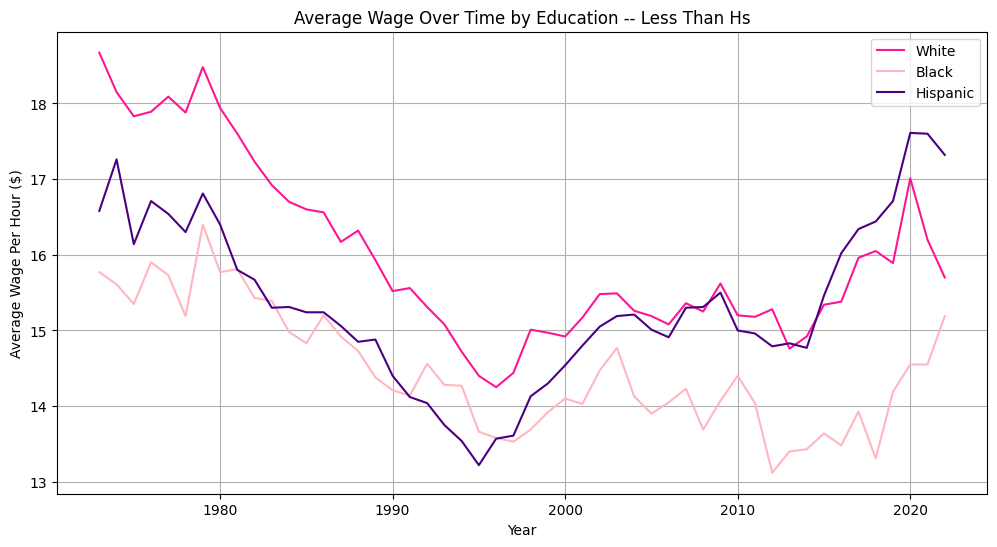

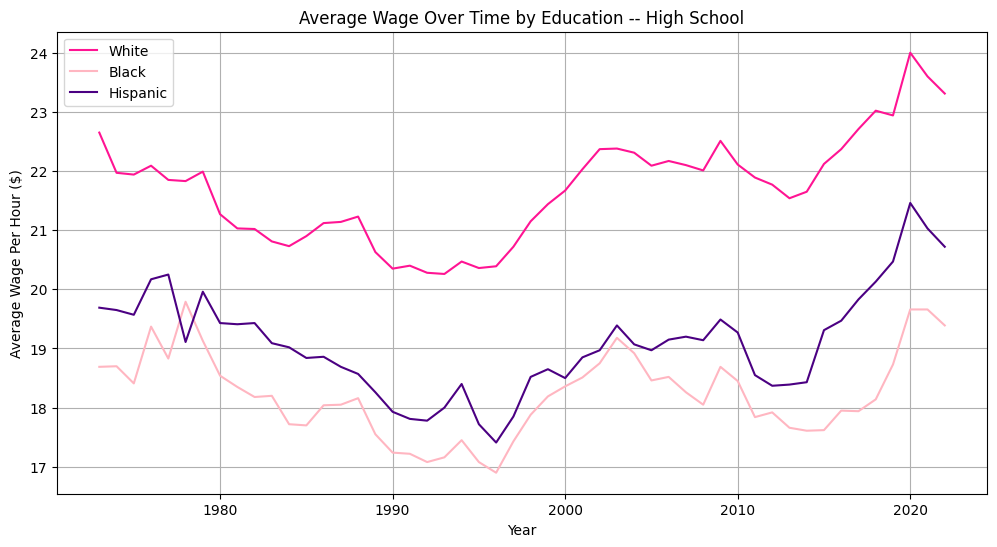

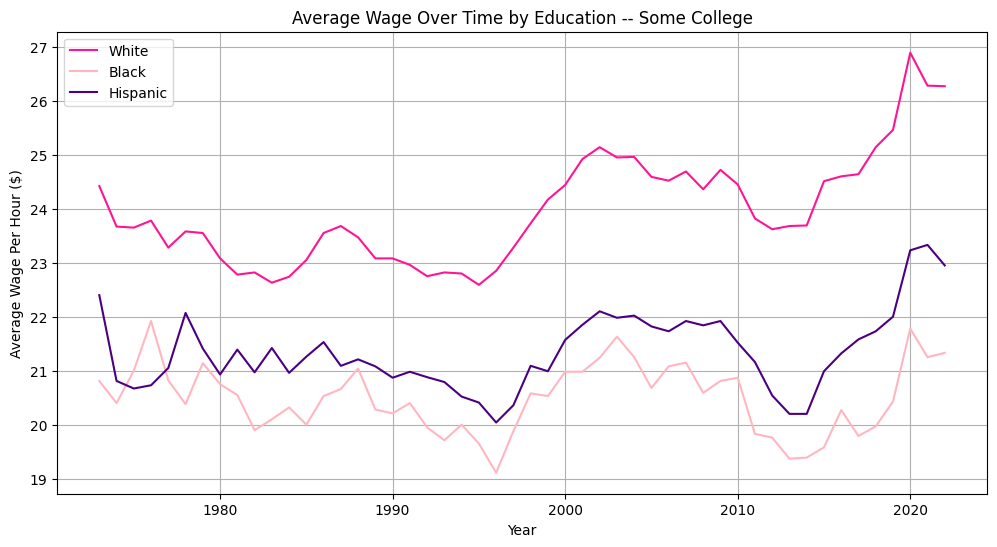

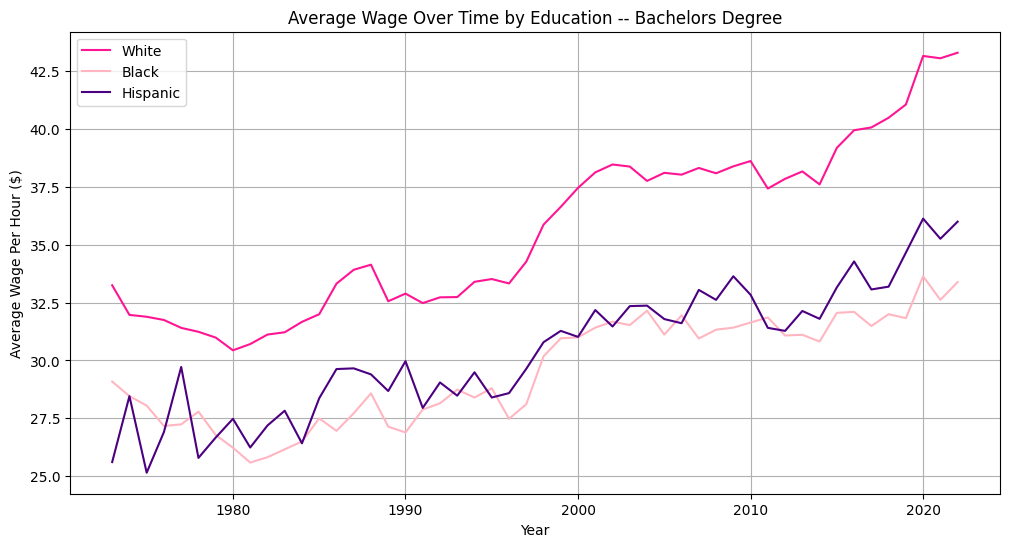

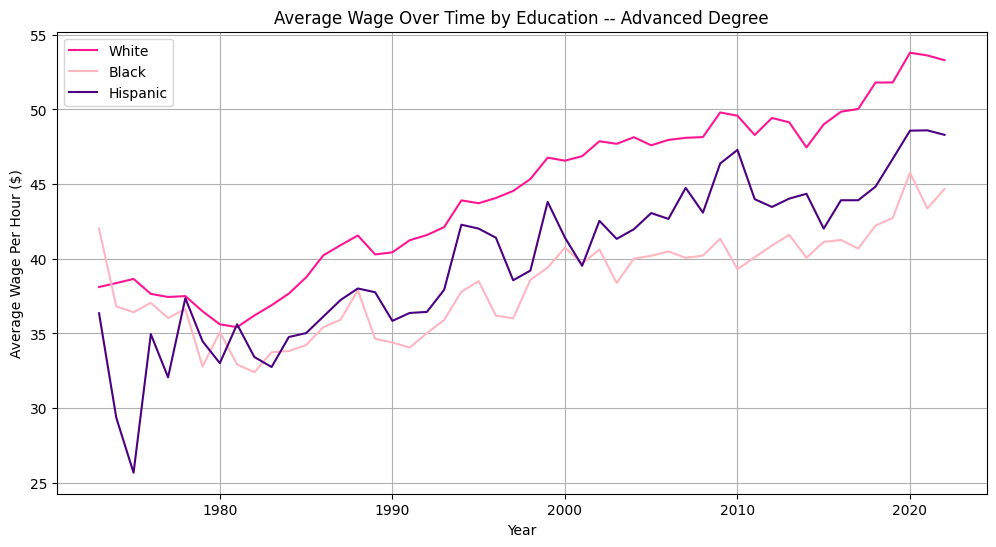

In [ ]:
# Creating line graphs to show average wages by race for the given education level over time

def plot_wages(education_level):
    # Create a list of columns to take data from
    columns = [f"white_{education_level}", f"black_{education_level}",
               f"hispanic_{education_level}"]

    # Create the line graph
    plt.figure(figsize=(12, 6))

    # Plot a line for each column
    for column in columns:
        plt.plot(data["year"], data[column],
                 label = get_label(column, education_level),
                 color = get_color(column, education_level))

    # Print the graph
    plt.title("Average Wage Over Time by Education -- " + education_level.replace("_", " ").title())
    plt.xlabel("Year")
    plt.ylabel("Average Wage Per Hour ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Assign the right label to the data
def get_label(column, education_level):
    labels = {f"white_{education_level}": "White",
              f"black_{education_level}": "Black",
              f"hispanic_{education_level}": "Hispanic"}
    return labels[column]

# Assign a different color to the data
def get_color(column, education_level):
    colors = {f"white_{education_level}": "deeppink",
              f"black_{education_level}": "lightpink",
              f"hispanic_{education_level}": "indigo"}
    return colors[column]

# Create the line graphs for each education level
plot_wages("less_than_hs")
plot_wages("high_school")
plot_wages("some_college")
plot_wages("bachelors_degree")
plot_wages("advanced_degree")

**Methods:**

I defined three funtions to access and display the data as shown above:


*   plot_wages(education_level): This function takes in an education_level as a parameter and creates a line graph based on the relevant data columns.


*   get_label(column): This function returns the label for a given column.
*   get_color(column): This function calls a color to associate with the line for a given column.


*   For all calls that start with plt, it is pulling from matplotlib to create my line graph, which includes a title, axis labels and modifications to make the graph fit the frame in an easy-to-read manner.

**Results:**
The line graphs show that for lower education levels (less than high school, high school, and some college), White individuals make 5 dollars or less more per hour on average compared to Black individuals. In contrast, White people with a bachelors or advanced degree tend to make closer to 10 dollars more per hour than Black individuals with the same education level. This suggests a more significant racial disparity in upper levels of education. Additionally, you can see from the graphs that racial disparities in earnings have remained relatively stable for low levels of education over the past 50 years, while they have increased over time within higher levels of education.

## **Race and Gender Gaps Within Education Levels**

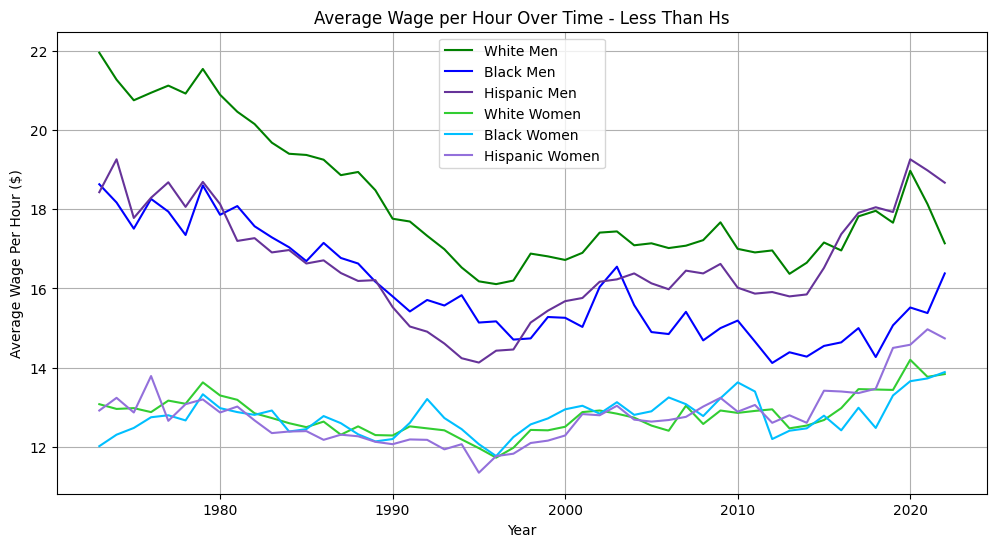

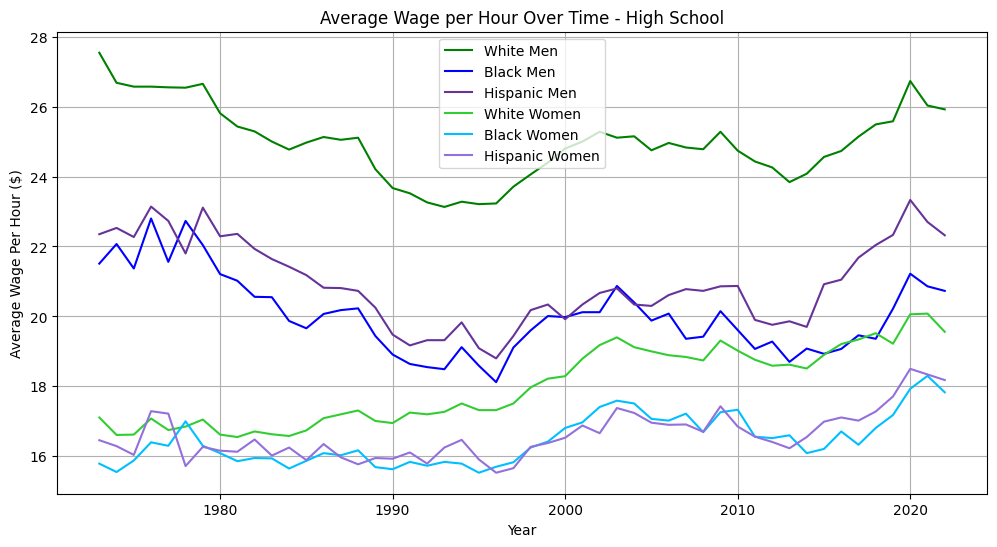

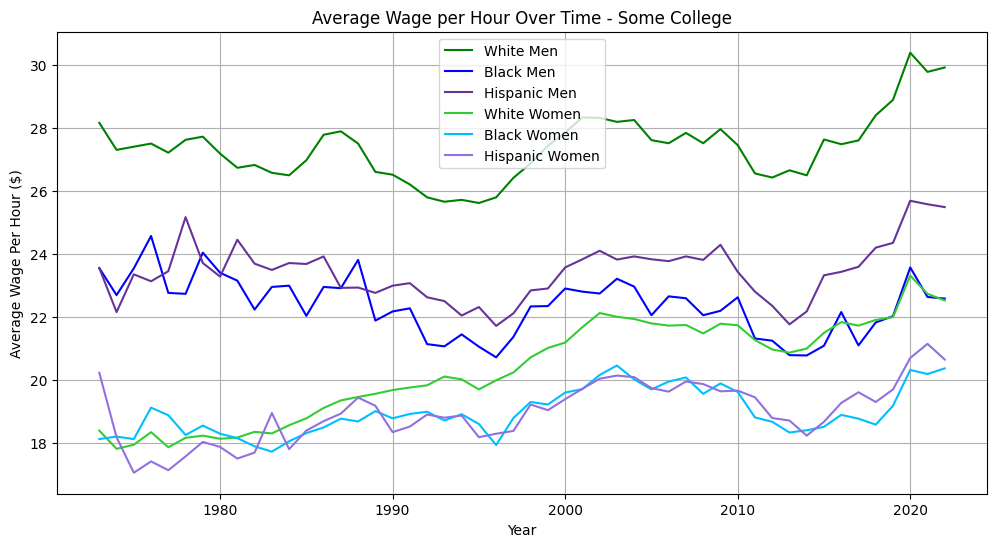

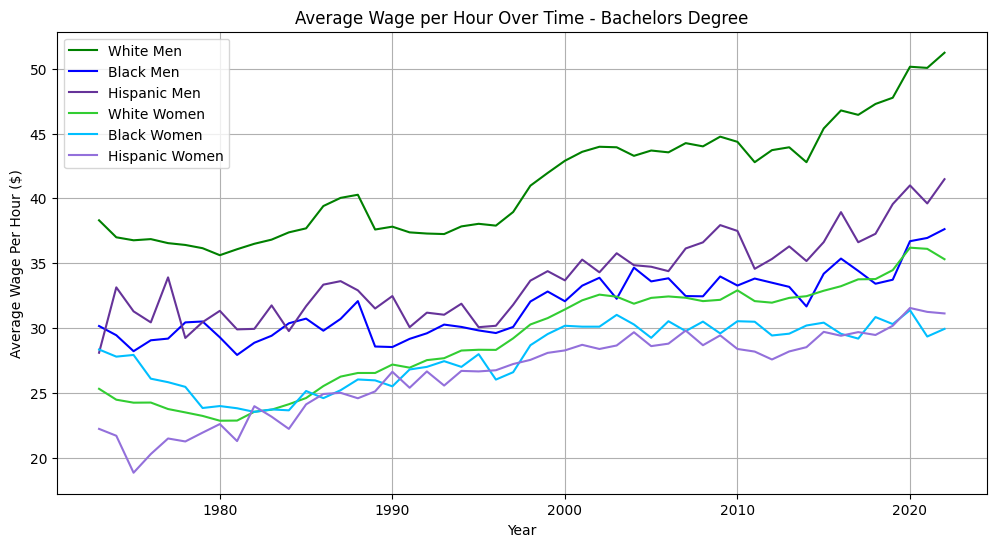

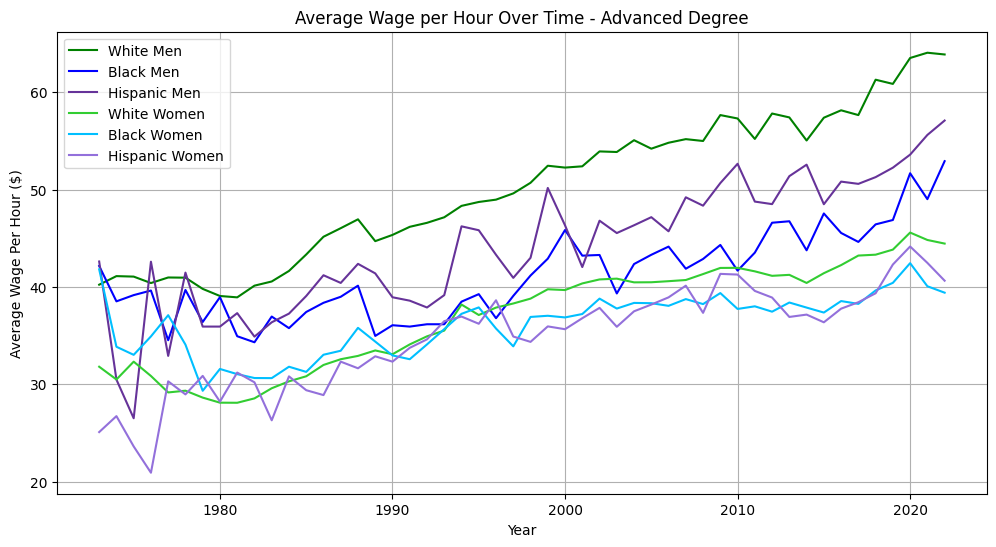

In [ ]:
# Creating line graphs for different demographics within distinct eduucation levels

# Assign labels to the data
def get_label(column, education_level = "adanced_degree"):
    labels = {f"white_men_{education_level}": "White Men",
              f"black_men_{education_level}": "Black Men",
              f"hispanic_men_{education_level}": "Hispanic Men",
              f"white_women_{education_level}": "White Women",
              f"black_women_{education_level}": "Black Women",
              f"hispanic_women_{education_level}": "Hispanic Women"}
    return labels[column]

# Assign colors to the data
def get_color(column, education_level = "advanced_degree"):
    colors = {f"white_men_{education_level}": "green",
              f"black_men_{education_level}": "blue",
              f"hispanic_men_{education_level}": "rebeccapurple",
              f"white_women_{education_level}": "limegreen",
              f"black_women_{education_level}": "deepskyblue",
              f"hispanic_women_{education_level}": "mediumpurple"}
    return colors[column]

# creates a line graph with lines for the given columns at the specified education level
def create_line_graph(columns, education_level):

  # create graph
  plt.figure(figsize=(12, 6))

  # plot column data on graph
  for column in columns:
    plt.plot(data["year"], data[column],
                 label = get_label(column, education_level),
                 color = get_color(column, education_level))

  plt.title("Average Wage per Hour Over Time - "
            + education_level.replace("_", " ").title())
  plt.xlabel("Year")
  plt.ylabel("Average Wage Per Hour ($)")
  plt.legend()
  plt.grid(True)
  plt.show()

# create lists of columns for each education level
less_than_hs_columns = ["white_men_less_than_hs", "black_men_less_than_hs",
                        "hispanic_men_less_than_hs", "white_women_less_than_hs",
                        "black_women_less_than_hs", "hispanic_women_less_than_hs"]
high_school_columns = ["white_men_high_school", "black_men_high_school",
                        "hispanic_men_high_school", "white_women_high_school",
                        "black_women_high_school", "hispanic_women_high_school"]
some_college_columns = ["white_men_some_college", "black_men_some_college",
                        "hispanic_men_some_college", "white_women_some_college",
                        "black_women_some_college", "hispanic_women_some_college"]
bachelors_degree_columns = ["white_men_bachelors_degree", "black_men_bachelors_degree",
                        "hispanic_men_bachelors_degree", "white_women_bachelors_degree",
                        "black_women_bachelors_degree", "hispanic_women_bachelors_degree"]
advanced_degree_columns = ["white_men_advanced_degree", "black_men_advanced_degree",
                        "hispanic_men_advanced_degree", "white_women_advanced_degree",
                        "black_women_advanced_degree", "hispanic_women_advanced_degree"]

# produce line graphs for each education level
create_line_graph(less_than_hs_columns, "less_than_hs")
create_line_graph(high_school_columns, "high_school")
create_line_graph(some_college_columns, "some_college")
create_line_graph(bachelors_degree_columns, "bachelors_degree")
create_line_graph(advanced_degree_columns, "advanced_degree")

**Methods:** The same methods were used to produce these graphs as prior line graphs.

**Results:** The graphs show that as of 2022, while there are racial disparities in wages, men of every race earn more than women of every race when they have the same level of education. This indicates that while both gender and race wage gaps exist, the gender wage gap is far more significant. Put another way, an individual's gender has a greater effect on their earnings than their race.

## **Gender Gaps Across Education Levels**

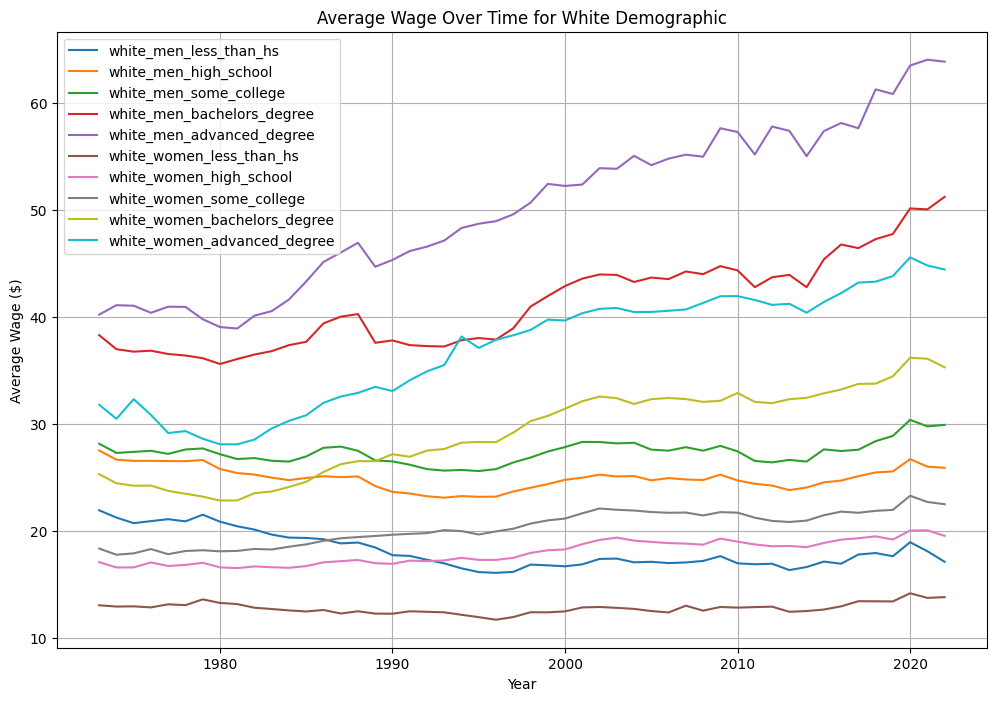

In [ ]:
# Compare average wages for each demographic over time (White)

# Selecting columns relevant to the White demographic group
white_demographics = [
    'white_men_less_than_hs', 'white_men_high_school', 'white_men_some_college',
    'white_men_bachelors_degree', 'white_men_advanced_degree',
    'white_women_less_than_hs', 'white_women_high_school', 'white_women_some_college',
    'white_women_bachelors_degree', 'white_women_advanced_degree'
]

# Extracting the selected data for the white demographic
white_data = data[['year'] + white_demographics]

# Setting the index to 'year' for plotting
white_data.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
for demographic in white_demographics:
    plt.plot(white_data.index, white_data[demographic], label=demographic)

plt.title('Average Wage Over Time for White Demographic')
plt.xlabel('Year')
plt.ylabel('Average Wage ($)')
plt.legend()
plt.grid(True)
plt.show()

**Results:**
This graph shows that there are three distinct education levels that are significant in determining a White individual's wages, after which gender becomes the most important factor. These education levels are less than high school, high school or some college, and bachelors or advanced degrees. While the dataset split education levels into five categories, these three groups cause the biggest change in a person's wages. After being identified as one of these three education levels, gender has more of an impact on a person's wages than having an advanced degree versus a bachelor's degree, for instance.

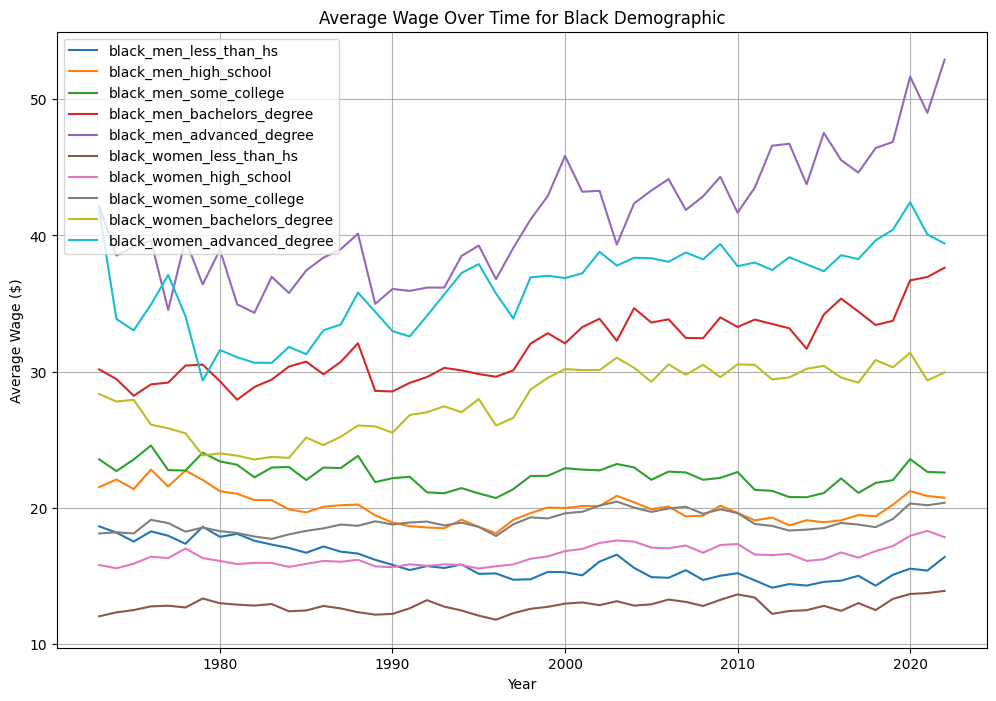

In [ ]:
# compare average wage growth for each demographic over time (Black)
#Create a line graph for the given education level
# Selecting columns relevant to the Black demographic group
black_demographics = [
    'black_men_less_than_hs', 'black_men_high_school', 'black_men_some_college',
    'black_men_bachelors_degree', 'black_men_advanced_degree',
    'black_women_less_than_hs', 'black_women_high_school', 'black_women_some_college',
    'black_women_bachelors_degree', 'black_women_advanced_degree'
]

# Extracting the selected data for the Black demographic
black_data = data[['year'] + black_demographics]

# Setting the index to 'year' for plotting
black_data.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
for demographic in black_demographics:
    plt.plot(black_data.index, black_data[demographic], label=demographic)

plt.title('Average Wage Over Time for Black Demographic')
plt.xlabel('Year')
plt.ylabel('Average Wage ($)')
plt.legend()
plt.grid(True)
plt.show()

**Results:** Having slightly different results from the White demographic, this grpah shows that there are four distinct education levels that matter most when determining a person's wages, after which gender becomes the most important factor. Unlike the White demographic, there appears to be a significant difference in earnings when a Black individual obtains an advanced degree versus a bachelor's degree. Men still earn more than women in both categories; however, black women with advanced degrees earn more than black men with bachelor's degrees.

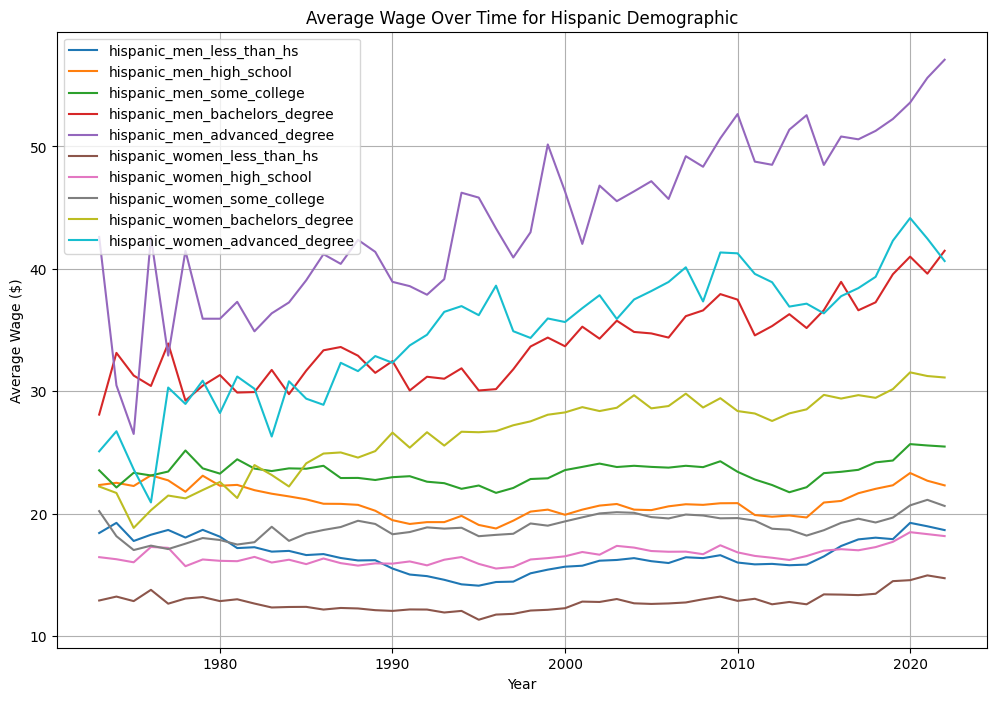

In [ ]:
# compare average wage growth for each demographic over time (Hispanic)
#Create a line graph for the given education level
# Selecting columns relevant to the Hispanic demographic group
hispanic_demographics = [
    'hispanic_men_less_than_hs', 'hispanic_men_high_school', 'hispanic_men_some_college',
    'hispanic_men_bachelors_degree', 'hispanic_men_advanced_degree',
    'hispanic_women_less_than_hs', 'hispanic_women_high_school', 'hispanic_women_some_college',
    'hispanic_women_bachelors_degree', 'hispanic_women_advanced_degree'
]

# Extracting the selected data for the Hispanic demographic
hispanic_data = data[['year'] + hispanic_demographics]

# Setting the index to 'year' for plotting
hispanic_data.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
for demographic in hispanic_demographics:
    plt.plot(hispanic_data.index, hispanic_data[demographic], label=demographic)

plt.title('Average Wage Over Time for Hispanic Demographic')
plt.xlabel('Year')
plt.ylabel('Average Wage ($)')
plt.legend()
plt.grid(True)
plt.show()

**Results:** This graph shows similar trends as the previous two graphs; however, the education levels are less distinct. For instance, Hispanic women with advanced degrees earn about the same as Hispanic men with Bachelor's degrees.

Overall,  the three graphs above show that within each racial demographic, men with high education levels earn the most, followed by women with high education levels, and then men with low education levels. Women with low education levels earn the least. This suggests that education level is the most significant factor in correlation with wages only to some extent. After education level, gender becomes the most significant factor, followed by race.

# **Summary of Results**

---



Through bar graphs, line graphs, and linear regression, we found that:

- Education level and wage have a strong positive correlation, where a higher education level is indicative of higher average wages.

- A disparity exists between men and women in their pay across all education levels.
  - This gap has decreased over time for lower education levels, but has increased over time for those with bachelors and advanced degrees.

- A wage gap exists between races, with White people typically being paid the most while Black people are paid the least.
  - This gap is smaller for people with lower levels of education and has mostly remained the same over time.
  - This gap is larger for people with high levels of education and has increased over time.

- Overall, a trend can be seen where wage gaps are less significant at lower levels of education and have either stayed the same or declined over time. In contrast, wage gaps are much larger within higher levels of education and these gaps appear to have increased over time.

- Gender appears to be a more significant factor than race in determining one's wages. Within each education level, men of all races earn more than women of all races.

- Education level is the most significant factor in determining wages only to some extent. At certain education levels, gender plays more of a role in an individual's wages than obtaining a slightly more advanced degree.

# **Conclusions and Future Work**

---



**Conclusion:**

The fight for equality in the workforce is clearly still ongoing, and although some progress has been made in the past few decades, there is still a lot of work to be done. As a whole, men and women still see a wage gap, and white people are still paid more than Hispanic and Black people. Additionally, while some of these gaps have decreased over time, wage disparities among different races and genders at high education levels have actually increased over time.


**Future Work:**

One shortcoming of our project was a lack of statistical tests. This was difficult to accomplish given the nature of our dataset, which only provided average wages per hour for each demogrpahic. For future work, it could be interesting to obtain a dataset that includes the gender, race, education level, and wage information of a random sample of people, which could then be used to conduct a multiple regression analysis and use machine learning to be able to predict a person's wages based on those factors.

Additionally, it would be interesting to see what factors are the best predictors of wages aside from race, gender, and education level. Physical attractiveness and having a criminal record are two examples of factors that could potentially have a significant effect on one's wages.